In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

df1 = pd.read_csv('/content/drive/MyDrive/NN-Jan2022/recon.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NN-Jan2022/labels.csv')

X = df1.values
y = df2.values

n = 49985

X = np.reshape(X, (n,13,21))

In [7]:
#note: labels.csv has 11 columns; you need to drop the column you don't want, and then adjust number of outputs in your NN

#df2.head()
df2.drop('x-entry', axis=1, inplace=True)
df2.drop('y-entry', axis=1, inplace=True)
df2.drop('z-entry', axis=1, inplace=True)
df2.drop('n_x', axis=1, inplace=True)
df2.drop('n_y', axis=1, inplace=True)
df2.drop('n_z', axis=1, inplace=True)
df2.drop('number_eh_pairs', axis=1, inplace=True)
df2.drop('spherR', axis=1, inplace=True)
#df2.drop('theta', axis=1, inplace=True)
df2.drop('phi', axis=1, inplace=True)
df2.drop('cosPhi', axis=1, inplace=True)
#df2.head()
#df2.shape

#reset y since you dropped columns
y = df2.values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'theta')

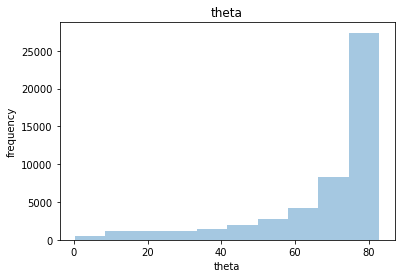

In [9]:
#histo. of true theta values
df_true_theta = pd.DataFrame(df2, columns=['theta'])
sns.distplot(df_true_theta['theta'], kde=False, bins=10)
plt.xlabel('theta')
plt.ylabel('frequency')
plt.title("theta")

In [10]:
#from https://keras.io/guides/writing_your_own_callbacks/
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))

    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("Start epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))

    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#scale input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

#make a simple model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(13, 21, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
#change the #nodes in layer below based on number of outputs #*****************
model.add(layers.Dense(1, activation='linear'))

model.summary()


(49985, 13, 21) (49985, 1)
(39988, 13, 21) (9997, 13, 21) (39988, 1) (9997, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 19, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1344)              0         
                                                                 
 dense (Dense)               (None, 64)                86080     
                                                                 
 dropout (Dropout)           (None, 64)    

In [12]:
#https://keras.io/guides/writing_your_own_callbacks/
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
        )

    def on_test_batch_end(self, batch, logs=None):
        print(
            "Up to batch {}, the average loss is {:7.2f}.".format(batch, logs["loss"])
        )

    def on_epoch_end(self, epoch, logs=None):
        print(
            "The average loss for epoch {} is {:7.2f} "
            "and mean squared error is {:7.2f}.".format(
                epoch, logs["loss"], logs["mean_squared_error"]
            )
        )


In [17]:
batch_size = 64
epochs = 50

model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=['mean_squared_error'])

history = model.fit(
          X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[LossAndErrorPrintingCallback()],)

res = model.evaluate(
    X_test, y_test, batch_size=batch_size,
)

predictions = model.predict(X_test, batch_size=batch_size, callbacks=[CustomCallback()])

Streaming output truncated to the last 5000 lines.
 26/625 [>.............................] - ETA: 17s - loss: 82.0084 - mean_squared_error: 82.0084Up to batch 26, the average loss is   82.89.
Up to batch 27, the average loss is   82.66.
 28/625 [>.............................] - ETA: 17s - loss: 82.6606 - mean_squared_error: 82.6606Up to batch 28, the average loss is   82.95.
Up to batch 29, the average loss is   83.00.
 30/625 [>.............................] - ETA: 16s - loss: 83.0001 - mean_squared_error: 83.0001Up to batch 30, the average loss is   82.61.
Up to batch 31, the average loss is   83.45.
 32/625 [>.............................] - ETA: 17s - loss: 83.4537 - mean_squared_error: 83.4537Up to batch 32, the average loss is   83.27.
Up to batch 33, the average loss is   83.17.
 34/625 [>.............................] - ETA: 17s - loss: 83.1740 - mean_squared_error: 83.1740Up to batch 34, the average loss is   83.17.
Up to batch 35, the average loss is   83.06.
 36/625 [>....

9997
          theta
0     73.203857
1     62.383507
2     62.363510
3     62.531158
4     21.235731
...         ...
9992  75.352928
9993  79.006607
9994  76.504929
9995  71.668671
9996  76.837410

[9997 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'theta')

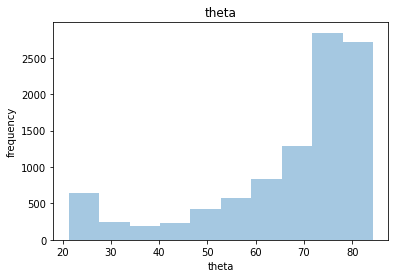

In [18]:
print(len(predictions))
df_predict = pd.DataFrame(predictions, columns=['theta'])
print(df_predict)
df_predict.head()
sns.distplot(df_predict['theta'], kde=False, bins=10)
plt.xlabel('theta')
plt.ylabel('frequency')
plt.title("theta")

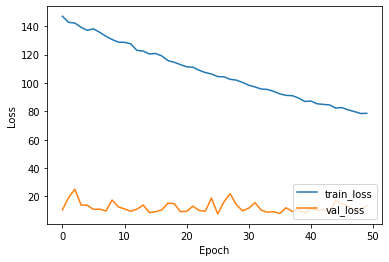

In [19]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')


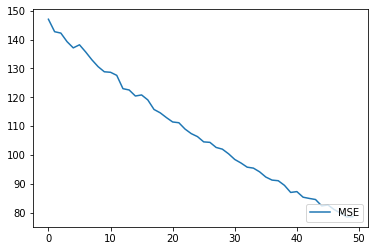

In [20]:
plt.plot(history.history['mean_squared_error'], label='MSE')
plt.legend(loc='lower right')